### Considerando os dividendos pagos, obtemos o seguinte retornos por portfólio:
#### Portfólio Conservador: R$561.90, ou seja, retorno de mais de 50%

#### Portfólio Equilibrado: R$606.41, retorno de por volta de 60%

#### Portfólio Arrojado: R$2959.05, retorno de quase 300%!. Esse portfólio aqui ficou bastante equilibrado até dado a escolha de colocar empresas como Petrobrás e WEG nele para dar uma equilibrada.

#### Lembre-se também que esse valor inflacionado do portfólio arrojado se deve também ao bom desempenho da ação da PetroRio e do contexto descrito nos trabalhos anteriores

### Após isso, montou-se um Portfólio Ideal. Esse portfólio contou com as 10 empresas de melhor desempenho dentre essas empresas de todos os portfólios iniciais. O retorno foi significativo com a PRIO3 na amostra. Sem ela, o retorno real foi baixo!



---



## Vamos ao código:

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Defino os portfólios

In [3]:
# Lista de tickers das empresas

#Portfólio conservador:
tickers_c = [
    'ITUB4.SA',  # Itaú Unibanco
    'ABEV3.SA',  # Ambev
    'VALE3.SA',  # Vale
    'WEGE3.SA',  # Weg
    'BRFS3.SA',  # BRF
    'BBSE3.SA',  # Banco do Brasil Seguros
    'VBBR3.SA',  #Vibra Energia
    'UGPA3.SA'  # Ultrapar
             ]

#Portfólio Equilibrado:
tickers_e = [
    'BBAS3.SA',  # Banco do Brasil
    'ITUB4.SA',  # Itaú Unibanco
    'PETR4.SA',  # Petrobras
    'ITSA4.SA',  # Itaúsa
    'RENT3.SA',  # Localiza
    'EMBR3.SA', # Embraer
    'CIEL3.SA',  # Cielo
    'SUZB3.SA',  # Suzano
    'JBSS3.SA'  #JBS
              ]

#Portfólio mais Arrojado:
tickers_a = [
    'COGN3.SA',  # Cogna
    'CYRE3.SA',  # Cyrela
    'FLRY3.SA',  # Fleury
    'PRIO3.SA',  # PetroRio
    'BRKM5.SA',   # Braskem
    'LREN3.SA',  # Lojas Renner
    'RAIL3.SA',  # Rumo SA
    'PETR4.SA',  # Petrobras
    'WEGE3.SA',  # Weg
    ]

## Função para baixar os preços das ações das empresas:

In [4]:
# Definir o intervalo de datas: de 08/08/2018 até 12/06/2024.
start = dt.datetime(2018, 8, 8)
end = dt.datetime(2024, 6, 12 )

def dados_preços(tickers):
    df = pd.DataFrame()
    for ticker in tickers:
        try:
            data = yf.download(ticker, start=start, end=end)['Close']
            df[ticker.split('.')[0]] = data
        except Exception as e:
            print(f"Erro ao baixar dados para {ticker}: {e}")
    df.reset_index(inplace=True)
    return df

In [5]:
df_conservador = dados_preços(tickers_c)
df_equilibrado = dados_preços(tickers_e)
df_arrojado = dados_preços(tickers_a)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

## Função para baixar os dividendos:

In [6]:
# Função para baixar e somar os dividendos
def dados_dividendos(tickers):
    dividendos = pd.DataFrame()
    for ticker in tickers:
        try:
            empresa = yf.Ticker(ticker)
            dados_div = empresa.dividends.reset_index()
            dados_div['Ticker'] = ticker
            dados_div['Date'] = dados_div['Date'].dt.tz_localize(None)
            dividendos = pd.concat([dividendos, dados_div], ignore_index=True)
        except Exception as e:
            print(f"Erro ao baixar dados para {ticker}: {e}")

    # Calcular a soma dos dividendos por empresa
    soma_dividendos = dividendos.groupby('Ticker')['Dividends'].sum().reset_index()
    return soma_dividendos

## Armazeno os dados portfólio por portfólio:

In [7]:
div_c = dados_dividendos(tickers_c)
div_e = dados_dividendos(tickers_e)
div_a = dados_dividendos(tickers_a)

## Visualizo os dados de dividendos pagos:

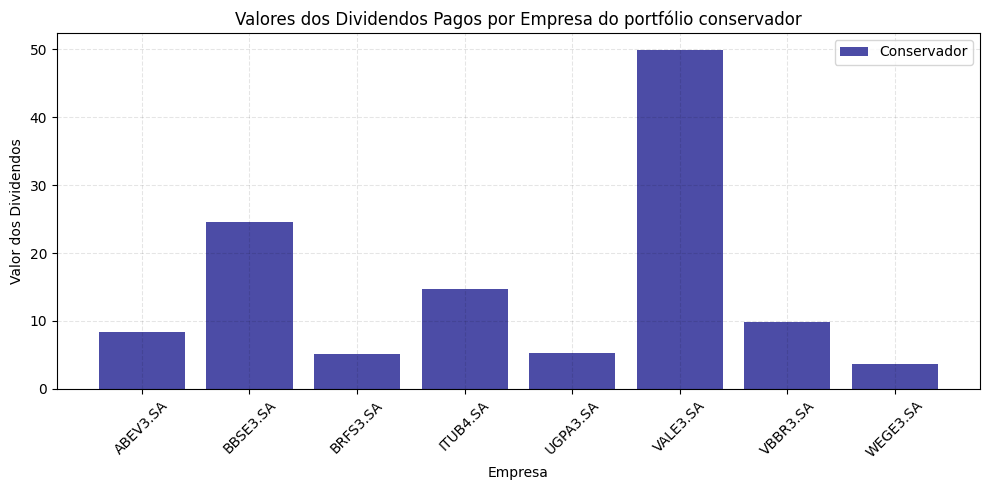

In [8]:
# Configurações do gráfico
plt.figure(figsize=(10, 5))
plt.title('Valores dos Dividendos Pagos por Empresa do portfólio conservador')
plt.xlabel('Empresa')
plt.ylabel('Valor dos Dividendos')

# Plotar os valores dos dividendos para cada portfólio
plt.bar(div_c['Ticker'], div_c['Dividends'], color='navy', alpha=0.7, label='Conservador')

# Adicionar legenda e mostrar o gráfico
plt.legend()
plt.grid(True, alpha = 0.1, color = 'black', linestyle ='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


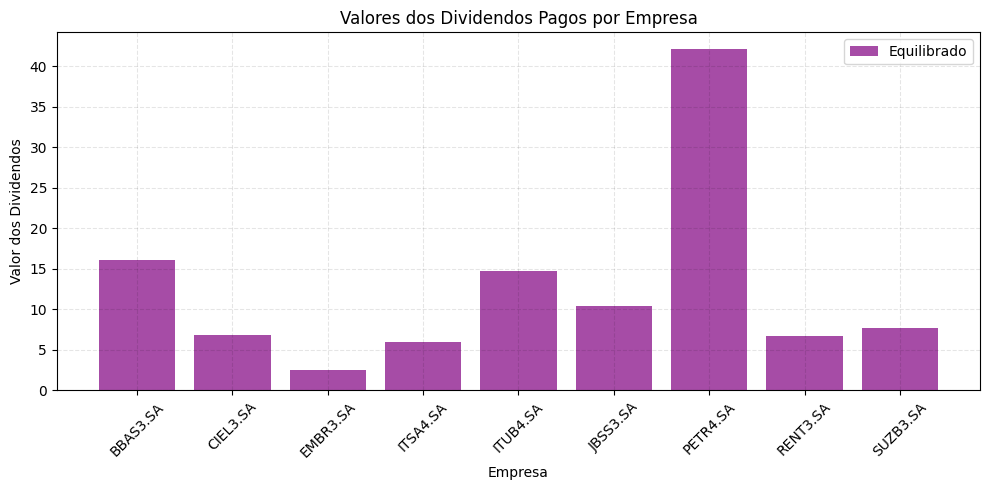

In [9]:
# Configurações do gráfico
plt.figure(figsize=(10, 5))
plt.title('Valores dos Dividendos Pagos por Empresa')
plt.xlabel('Empresa')
plt.ylabel('Valor dos Dividendos')
plt.bar(div_e['Ticker'], div_e['Dividends'], color='purple', alpha=0.7, label='Equilibrado')
plt.legend()
plt.grid(True, alpha = 0.1, color = 'black', linestyle ='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

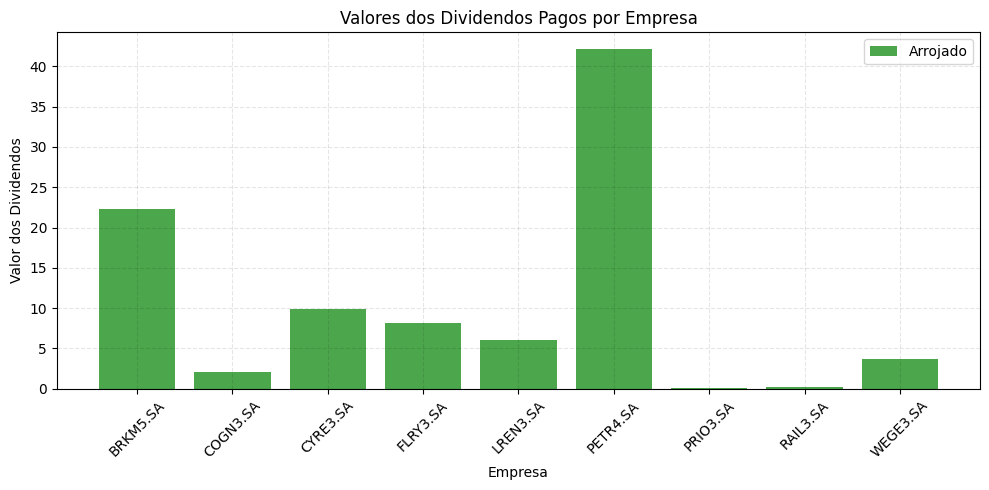

In [10]:
# Configurações do gráfico
plt.figure(figsize=(10, 5))
plt.title('Valores dos Dividendos Pagos por Empresa')
plt.xlabel('Empresa')
plt.ylabel('Valor dos Dividendos')
plt.bar(div_a['Ticker'], div_a['Dividends'], color='green', alpha=0.7, label='Arrojado')
plt.legend()
plt.grid(True, alpha = 0.1, color = 'black', linestyle ='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Exibir isso na forma de tabela:

In [11]:
# Exibir a soma dos dividendos
print('Somatório dos dividendos pagos do portfólio conservador:')
print(div_c)
print()
print('Somatório dos dividendos pagos do portfólio equilibrado:')
print(div_e)
print()
'Somatório dos dividendos pagos do portfólio arrojado:'
print(div_a)

Somatório dos dividendos pagos do portfólio conservador:
     Ticker  Dividends
0  ABEV3.SA   8.327501
1  BBSE3.SA  24.510013
2  BRFS3.SA   5.053813
3  ITUB4.SA  14.761792
4  UGPA3.SA   5.281874
5  VALE3.SA  49.951532
6  VBBR3.SA   9.806371
7  WEGE3.SA   3.675268

Somatório dos dividendos pagos do portfólio equilibrado:
     Ticker  Dividends
0  BBAS3.SA  16.023294
1  CIEL3.SA   6.781739
2  EMBR3.SA   2.528968
3  ITSA4.SA   5.971944
4  ITUB4.SA  14.761792
5  JBSS3.SA  10.401434
6  PETR4.SA  42.107566
7  RENT3.SA   6.748610
8  SUZB3.SA   7.729471

     Ticker  Dividends
0  BRKM5.SA  22.345560
1  COGN3.SA   2.128259
2  CYRE3.SA   9.908162
3  FLRY3.SA   8.174838
4  LREN3.SA   6.015275
5  PETR4.SA  42.107566
6  PRIO3.SA   0.072644
7  RAIL3.SA   0.177726
8  WEGE3.SA   3.675268


## Vou criar uma função para claular o retorno geral. Retorno geral = Dividendos pagos + Valorização do preço da ação

In [12]:
def calcular_retorno_total(df, dividendos, investimento_inicial=1000):
    retorno_total = 0
    for ticker in df.columns[1:]:
        preco_compra = df[ticker].iloc[0]  # Preço de compra da ação
        preco_atual = df[ticker].iloc[-1]  # Preço atual da ação
        alocacao = investimento_inicial / len(df.columns[1:])  # Alocação inicial para cada ação
        if preco_compra == 0:
            print(f"Preço de compra igual a zero para {ticker}. Ignorando ação.")
            continue
        acoes_compradas = alocacao / preco_compra  # Número de ações compradas
        retorno_acao = (preco_atual - preco_compra) * acoes_compradas + dividendos[dividendos['Ticker'] == ticker]['Dividends'].sum()
        retorno_total += retorno_acao
    return retorno_total

## Armazeno os retornos portfólio por portfólio:

In [13]:
retorno_total_conservador = calcular_retorno_total(df_conservador, div_c)
retorno_total_equilibrado = calcular_retorno_total(df_equilibrado, div_e)
retorno_total_arrojado = calcular_retorno_total(df_arrojado, div_a)

In [14]:
print(f"Retorno Total do Portfólio Conservador: R${retorno_total_conservador:.2f}")
print(f"Retorno Total do Portfólio Equilibrado: R${retorno_total_equilibrado:.2f}")
print(f"Retorno Total do Portfólio Arrojado: R${retorno_total_arrojado:.2f}")

Retorno Total do Portfólio Conservador: R$561.90
Retorno Total do Portfólio Equilibrado: R$606.41
Retorno Total do Portfólio Arrojado: R$2959.05


## Veja que todos tiveram retornos positivos.



---



## Agora vou simular o investimento de R$1000 em cada portfólio:

### Portfólio Conservador:

In [15]:
investimento_inicial = 1000
retorno_total = 0

# Calcular o retorno total do portfólio para o portfólio conservador
for ticker in df_conservador.columns[1:]:
    preco_compra = df_conservador[ticker].iloc[0]  # Preço de compra da ação
    print(f"Preço de compra para {ticker}: {preco_compra}")

    preco_atual = df_conservador[ticker].iloc[-1]  # Preço atual da ação
    print(f"Preço atual para {ticker}: {preco_atual}")

    alocacao = investimento_inicial / len(df_conservador.columns[1:])  # Alocação inicial para cada ação
    print(f"Alocação para {ticker}: {alocacao}")

    if preco_compra == 0:
        print(f"Preço de compra igual a zero para {ticker}. Ignorando ação.")
        continue
    acoes_compradas = alocacao / preco_compra  # Número de ações compradas
    print(f"Número de ações compradas para {ticker}: {acoes_compradas}")

    retorno_acao = (preco_atual - preco_compra) * acoes_compradas + div_c.loc[div_c['Ticker'] == ticker]['Dividends'].sum()
    retorno_total += retorno_acao

    print(f"Retorno da ação {ticker}: R${retorno_acao:.2f}")
    print()

print(f"Retorno Total do Portfólio Conservador: R${retorno_total:.2f}")


Preço de compra para ITUB4: 30.066665649414062
Preço atual para ITUB4: 31.549999237060547
Alocação para ITUB4: 125.0
Número de ações compradas para ITUB4: 4.157428078574985
Retorno da ação ITUB4: R$6.17

Preço de compra para ABEV3: 19.15999984741211
Preço atual para ABEV3: 11.399999618530273
Alocação para ABEV3: 125.0
Número de ações compradas para ABEV3: 6.524008402687092
Retorno da ação ABEV3: R$-50.63

Preço de compra para VALE3: 52.400001525878906
Preço atual para VALE3: 60.97999954223633
Alocação para VALE3: 125.0
Número de ações compradas para VALE3: 2.385496113740874
Retorno da ação VALE3: R$20.47

Preço de compra para WEGE3: 9.0649995803833
Preço atual para WEGE3: 37.79999923706055
Alocação para WEGE3: 125.0
Número de ações compradas para WEGE3: 13.78930014188865
Retorno da ação WEGE3: R$396.24

Preço de compra para BRFS3: 21.44641876220703
Preço atual para BRFS3: 19.0
Alocação para BRFS3: 125.0
Número de ações compradas para BRFS3: 5.828478935619569
Retorno da ação BRFS3: R$-1

### Portfólio Moderado:

In [16]:
investimento_inicial = 1000
retorno_total = 0

# Calcular o retorno total do portfólio para cada portfólio
for ticker in df_equilibrado.columns[1:]:
    preco_compra = df_equilibrado[ticker].iloc[0]  # Preço de compra da ação
    print(f"Preço de compra para {ticker}: {preco_compra}")

    preco_atual = df_equilibrado[ticker].iloc[-1]  # Preço atual da ação
    print(f"Preço atual para {ticker}: {preco_atual}")

    alocacao = investimento_inicial / len(df_equilibrado.columns[1:])  # Alocação inicial para cada ação
    print(f"Alocação para {ticker}: {alocacao}")

    if preco_compra == 0:
        print(f"Preço de compra igual a zero para {ticker}. Ignorando ação.")
        continue
    acoes_compradas = alocacao / preco_compra  # Número de ações compradas
    print(f"Número de ações compradas para {ticker}: {acoes_compradas}")

    retorno_acao = (preco_atual - preco_compra) * acoes_compradas + div_e.loc[div_e['Ticker'] == ticker]['Dividends'].sum()
    retorno_total += retorno_acao

    print(f"Retorno da ação {ticker}: R${retorno_acao:.2f}")
    print()

print(f"Retorno Total do Portfólio Equilibrado: R${retorno_total:.2f}")


Preço de compra para BBAS3: 16.315000534057617
Preço atual para BBAS3: 27.510000228881836
Alocação para BBAS3: 111.11111111111111
Número de ações compradas para BBAS3: 6.81036515317093
Retorno da ação BBAS3: R$76.24

Preço de compra para ITUB4: 30.066665649414062
Preço atual para ITUB4: 31.549999237060547
Alocação para ITUB4: 111.11111111111111
Número de ações compradas para ITUB4: 3.6954916253999865
Retorno da ação ITUB4: R$5.48

Preço de compra para PETR4: 20.139999389648438
Preço atual para PETR4: 37.65999984741211
Alocação para PETR4: 111.11111111111111
Número de ações compradas para PETR4: 5.516937163772708
Retorno da ação PETR4: R$96.66

Preço de compra para ITSA4: 8.720075607299805
Preço atual para ITSA4: 9.760000228881836
Alocação para ITSA4: 111.11111111111111
Número de ações compradas para ITSA4: 12.741989417855171
Retorno da ação ITSA4: R$13.25

Preço de compra para RENT3: 23.328235626220703
Preço atual para RENT3: 41.54999923706055
Alocação para RENT3: 111.11111111111111
Nú

### Portfólio Arrojado:

In [17]:
investimento_inicial = 1000
retorno_total = 0

# Calcular o retorno total do portfólio para cada portfólio
for ticker in df_arrojado.columns[1:]:
    preco_compra = df_arrojado[ticker].iloc[0]  # Preço de compra da ação
    print(f"Preço de compra para {ticker}: {preco_compra}")

    preco_atual = df_arrojado[ticker].iloc[-1]  # Preço atual da ação
    print(f"Preço atual para {ticker}: {preco_atual}")

    alocacao = investimento_inicial / len(df_arrojado.columns[1:])  # Alocação inicial para cada ação
    print(f"Alocação para {ticker}: {alocacao}")

    if preco_compra == 0:
        print(f"Preço de compra igual a zero para {ticker}. Ignorando ação.")
        continue
    acoes_compradas = alocacao / preco_compra  # Número de ações compradas
    print(f"Número de ações compradas para {ticker}: {acoes_compradas}")

    retorno_acao = (preco_atual - preco_compra) * acoes_compradas + div_a.loc[div_a['Ticker'] == ticker]['Dividends'].sum()
    retorno_total += retorno_acao

    print(f"Retorno da ação {ticker}: R${retorno_acao:.2f}")
    print()

print(f"Retorno Total do Portfólio Arrojado: R${retorno_total:.2f}")


Preço de compra para COGN3: 10.460000038146973
Preço atual para COGN3: 1.8200000524520874
Alocação para COGN3: 111.11111111111111
Número de ações compradas para COGN3: 10.622477122934587
Retorno da ação COGN3: R$-91.78

Preço de compra para CYRE3: 12.069999694824219
Preço atual para CYRE3: 19.530000686645508
Alocação para CYRE3: 111.11111111111111
Número de ações compradas para CYRE3: 9.205560391087424
Retorno da ação CYRE3: R$68.67

Preço de compra para FLRY3: 25.94158935546875
Preço atual para FLRY3: 14.479999542236328
Alocação para FLRY3: 111.11111111111111
Número de ações compradas para FLRY3: 4.283126588297789
Retorno da ação FLRY3: R$-49.09

Preço de compra para PRIO3: 1.7001999616622925
Preço atual para PRIO3: 42.54999923706055
Alocação para PRIO3: 111.11111111111111
Número de ações compradas para PRIO3: 65.35179015206971
Retorno da ação PRIO3: R$2669.61

Preço de compra para BRKM5: 55.29999923706055
Preço atual para BRKM5: 18.299999237060547
Alocação para BRKM5: 111.11111111111



---



## Vou criar o portfólio ideal do período com as empresas que mais deram retorno:

In [19]:
def calcular_retorno_por_empresa(df, dividendos):
    retorno_empresas = []
    for ticker in df.columns[1:]:
        preco_compra = df[ticker].iloc[0]
        preco_atual = df[ticker].iloc[-1]
        if preco_compra == 0:
            print(f"Preço de compra igual a zero para {ticker}. Ignorando ação.")
            continue
        acoes_compradas = 1000 / preco_compra
        retorno_acao = (preco_atual - preco_compra) * acoes_compradas + dividendos[dividendos['Ticker'] == ticker]['Dividends'].sum()
        retorno_empresas.append((ticker, retorno_acao))
    return pd.DataFrame(retorno_empresas, columns=['Ticker', 'Retorno'])

In [20]:
# Calcular retorno por empresa para cada portfólio
retorno_conservador = calcular_retorno_por_empresa(df_conservador, div_c)
retorno_equilibrado = calcular_retorno_por_empresa(df_equilibrado, div_e)
retorno_arrojado = calcular_retorno_por_empresa(df_arrojado, div_a)

In [35]:
# Combinar os retornos de todas as empresas em um único DataFrame
retornos_combined = pd.concat([retorno_conservador, retorno_equilibrado, retorno_arrojado])

# Remover duplicatas caso uma empresa apareça em mais de um portfólio
retornos_combined = retornos_combined.drop_duplicates(subset='Ticker')

# Ordenar as empresas pelo retorno de forma decrescente
retornos_combined = retornos_combined.sort_values(by='Retorno', ascending=False)

In [36]:
# Selecionar as 10 empresas com os maiores retornos
portfolio_ideal = retornos_combined.head(10)

print("Portfólio Ideal com as 10 empresas que mais deram retorno:")
portfolio_ideal

Portfólio Ideal com as 10 empresas que mais deram retorno:


,Ticker,Retorno
3,PRIO3,24026.467590
3,WEGE3,3169.884279
8,JBSS3,2304.591178
7,UGPA3,1196.093456
5,EMBR3,1124.247422
2,PETR4,869.910675
4,RENT3,781.103376
0,BBAS3,686.178322
1,CYRE3,618.061407
6,RAIL3,374.570429


In [27]:
soma_retornos = portfolio_ideal['Retorno'].sum()
print(f"Soma dos retornos das 10 empresas: R${soma_retornos:.2f}")

Soma dos retornos das 10 empresas: R$35151.11


## Veja: se tivesse investido 1000 nesse portfólio em 2018 e segurado até hoje, você teria R$35.000!

## Lembre-se que a PetroRio está inflando os resultados por conta de seu desempenho meteórico.

## Veja isso em um gráfico:

<ipython-input-37-1ef6cb425cb5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticker', y='Retorno', data=portfolio_ideal, palette='viridis')


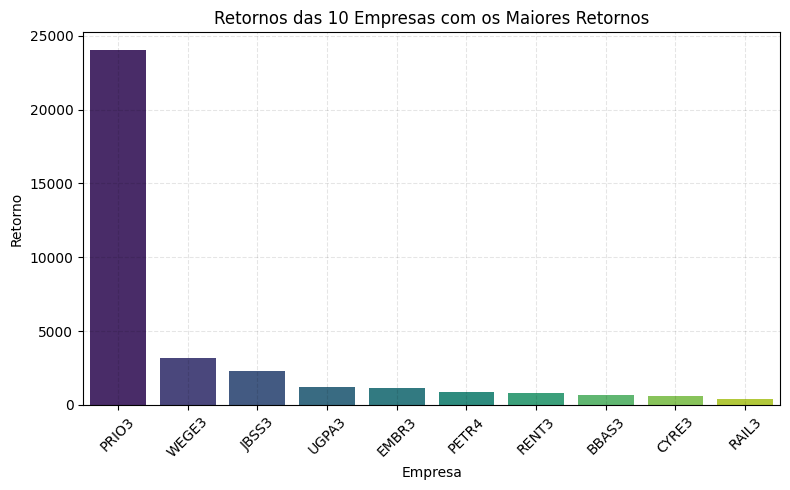

In [37]:
# gráfico de barras com os retornos por empresa com o seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Ticker', y='Retorno', data=portfolio_ideal, palette='viridis')
plt.title('Retornos das 10 Empresas com os Maiores Retornos')
plt.xlabel('Empresa')
plt.ylabel('Retorno')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, alpha = 0.1, color = 'black', linestyle ='--')
plt.show()

## Veja os retornos da PRIO3

## Vou retirá-la para deixar mais "realista":

In [38]:
#vou apagar a linha PRIO3
portfolio_ideal = portfolio_ideal[portfolio_ideal['Ticker'] != 'PRIO3']
portfolio_ideal

,Ticker,Retorno
3,WEGE3,3169.884279
8,JBSS3,2304.591178
7,UGPA3,1196.093456
5,EMBR3,1124.247422
2,PETR4,869.910675
4,RENT3,781.103376
0,BBAS3,686.178322
1,CYRE3,618.061407
6,RAIL3,374.570429


In [40]:
soma_retornos = portfolio_ideal['Retorno'].sum()
print(f"Soma dos retornos das 9 empresas: R${soma_retornos:.2f}")

Soma dos retornos das 9 empresas: R$11124.64


## Veja que a PRIO3 foi a impulsionadora de ganhos mesmo no portfólio ideal. O crescimento do preço das ações dela no período foi muito grande. O retorno Real é a diferença dos R$1000 colocados em cada empresa menos o retorno total.

## Ver isso em um gráfico:

<ipython-input-41-1ef6cb425cb5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticker', y='Retorno', data=portfolio_ideal, palette='viridis')


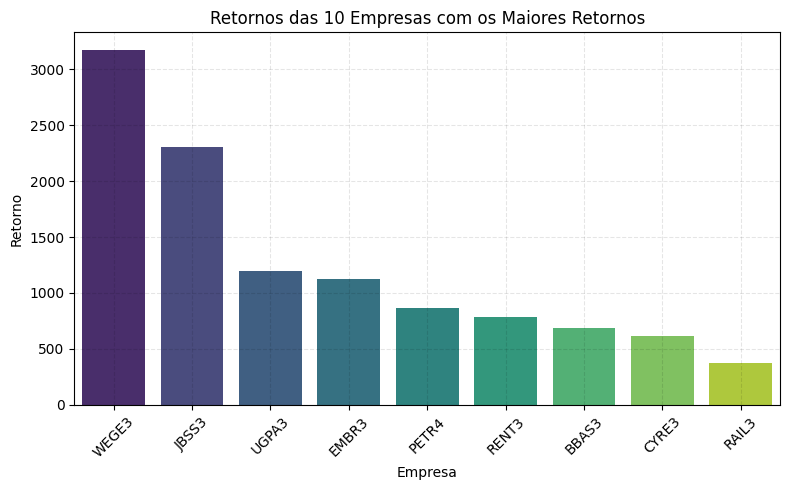

In [41]:
# gráfico de barras com os retornos por empresa com o seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Ticker', y='Retorno', data=portfolio_ideal, palette='viridis')
plt.title('Retornos das 10 Empresas com os Maiores Retornos')
plt.xlabel('Empresa')
plt.ylabel('Retorno')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, alpha = 0.1, color = 'black', linestyle ='--')
plt.show()

## Ficou bastante interessante, repare..